## Link Prediction

In [1]:
# import google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Reading Dataset and Visualizing Network Graph

In [2]:
# importing required modules
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import os
os.chdir('/content/drive/MyDrive/Graph Analytics Project')

In [5]:
# reading and loading the dataset
import pandas as pd

Dataset = pd.read_csv('amazon_copurchase_5000.csv')
Dataset.columns = ['Source', 'Target']
print(Dataset.count())
Dataset.head()

Source    5000
Target    5000
dtype: int64


,Source,Target
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


## Graph Construction

In [6]:
# graph object construction
Graph = nx.from_pandas_edgelist(Dataset, 'Source', 'Target', create_using = nx.Graph())
plt.figure(figsize = (10, 10))
pos = nx.random_layout(Graph, seed = 30)
nx.draw(Graph, with_labels = False,  pos = pos, node_size = 40, alpha = 0.3, edge_color = 'green', node_color = 'blue')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Print the Number of Nodes and Edges in the Network

In [7]:

# Print the edges and length of the nodes
print("\n\n The nodes of the label graph are:", Graph.nodes())
print("\n\n The number of nodes in the network are:", len(Graph.nodes()))

# Print the edges and length of edges
print("\n\n The edges of the label graph are:", Graph.edges())
print("\n\n The number of edges in the network are:", len(Graph.edges()))



 The nodes of the label graph are: [0, 1, 2, 3, 4, 5, 15, 11, 12, 13, 14, 63, 64, 65, 66, 67, 7, 16, 17, 18, 19, 6, 8, 9, 10, 20, 30, 290, 21, 22, 23, 24, 137, 138, 139, 25, 26, 260, 261, 262, 263, 264, 140, 141, 27, 28, 29, 68, 69, 70, 71, 72, 73, 75, 31, 32, 33, 34, 35, 36, 74, 77, 164, 37, 38, 39, 111, 142, 40, 41, 42, 43, 44, 45, 46, 47, 265, 266, 267, 268, 76, 78, 79, 80, 81, 82, 143, 144, 145, 146, 147, 48, 49, 50, 83, 84, 85, 51, 148, 149, 150, 56, 93, 94, 95, 151, 52, 53, 54, 55, 152, 153, 154, 155, 97, 269, 270, 271, 272, 273, 86, 87, 59, 88, 57, 58, 156, 157, 158, 89, 90, 274, 275, 276, 277, 278, 60, 61, 62, 159, 91, 92, 96, 160, 161, 162, 163, 98, 99, 279, 280, 100, 101, 418, 419, 118, 281, 105, 106, 420, 102, 103, 421, 104, 107, 108, 282, 109, 110, 121, 283, 284, 285, 286, 422, 423, 424, 425, 112, 113, 426, 287, 288, 289, 291, 292, 293, 165, 166, 167, 427, 428, 168, 169, 170, 171, 114, 115, 294, 172, 173, 295, 296, 297, 429, 174, 116, 117, 119, 175, 176, 177, 307, 430, 29

## Create the Adjacency Matrix

In [8]:
Source = set(Dataset['Source'].unique())
Target = set(Dataset['Target'].unique())

Nodes = list(Source.union(Target))
print(Nodes)

Number_of_Nodes = len(Nodes)

print(Number_of_Nodes)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [9]:

Adjacency_Matrix = nx.to_numpy_array(Graph, nodelist = Nodes)
Adjacency_Matrix

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Finding Missing Edges from the Network

In [10]:
Missing_Nodes = []
Number = 0
for i in tqdm(range(Number_of_Nodes)):
    for j in range(Number, Number_of_Nodes):
        if(i != j):
            try:
                if nx.shortest_path_length(Graph, Nodes[i], Nodes[j]) <= 2:
                    if Adjacency_Matrix[i,j] == 0:
                        Missing_Nodes.append([Nodes[i], Nodes[j]])
            except:
                continue
    Number += 1

100%|██████████| 1761/1761 [02:21<00:00, 12.47it/s] 


## Sampling a Part of Connected Edges for Training

In [ ]:
Removed_Edges = []
DF = Dataset.copy()
N = 0
for i in tqdm(Dataset.index.values):
    Current = nx.from_pandas_edgelist(DF.drop(index = i), 'Source', 'Target', create_using = nx.Graph())
    if(nx.number_connected_components(Current) == 1 and len(Current.nodes) == Number_of_Nodes):
        N += 1
        if(N >= 2):
            N = 0
            continue
        Removed_Edges.append(i)
        DF = DF.drop(index = i)

 26%|██▋       | 1322/5000 [00:25<01:11, 51.75it/s]

## Combining Data of Connected and Missing Edges for Training

In [ ]:
Positive_Samples = Dataset.loc[Removed_Edges]
Positive_Samples['Label'] = 1


In [ ]:
Positive_Samples

In [ ]:
Positive_Samples.to_csv('Positive_Samples.csv')

In [ ]:
Negative_Samples = pd.DataFrame(list(Missing_Nodes), columns = ['Source', 'Target'])
Negative_Samples['Label'] = 0

In [ ]:
len(Negative_Samples)

In [ ]:
Negative_Samples = Negative_Samples.head(5000)

In [ ]:
Negative_Samples

In [ ]:
Negative_Samples.to_csv('Negative_Samples.csv')

In [ ]:
Train_Dataset = pd.concat([Positive_Samples, Negative_Samples], axis = 0)

In [ ]:
Train_Dataset

In [ ]:
Train_Dataset.to_csv('Train_Dataset.csv')

## Create graph object

In [ ]:
# Build graph

G_data = nx.from_pandas_edgelist(Train_Dataset, "Source", "Target", create_using=nx.Graph())

In [ ]:
# Visualize the graph

plt.figure(figsize=(10, 10))
pos = nx.random_layout(G_data, seed=30)
nx.draw(G_data, with_labels=False, pos=pos, node_size=40, alpha=0.3, edge_color="lightblue", node_color="black")
plt.show()


## Generate Node Embeddings with Node 2 Vec Embeddings

In [ ]:
!pip install node2vec

In [ ]:
import node2vec
from node2vec import Node2Vec

# Generate walks
node2vec = Node2Vec(G_data, dimensions=100, walk_length=16, num_walks=50)

# train node2vec model
n2w_model = node2vec.fit(window=7, min_count=1)

## Model fitting

In [ ]:
X_Dataset = Train_Dataset[['Source', 'Target']]
Y_Dataset = Train_Dataset['Label']
X_Train, X_Test, Y_Train, Y_Test  = train_test_split(X_Dataset, Y_Dataset, test_size = 0.3, random_state = 10)

## Logistic Regression

In [ ]:
lr = LogisticRegression(class_weight="balanced")

lr.fit(X_Train, Y_Train)

In [ ]:
predictions_lr = lr.predict(X_Test)

In [ ]:
# print accuracy

from sklearn.metrics import accuracy_score


accuracy_lr = accuracy_score(Y_Test, predictions_lr)
print(accuracy_lr)


In [ ]:
# Print MSE

from sklearn.metrics import mean_squared_error
lr_mse = mean_squared_error(Y_Test, predictions_lr)
print(mean_squared_error(Y_Test, predictions_lr))


In [ ]:
from sklearn.metrics import roc_auc_score

lr_roc_auc = roc_auc_score(Y_Test, predictions_lr)
lr_roc_auc

In [ ]:
# print classification report

print(classification_report(Y_Test, predictions_lr.round()))


In [ ]:
# print confusion matrix

print(confusion_matrix(Y_Test, predictions_lr.round()))


## Decision Tree

In [ ]:
# Fit a decision tree model

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_Train, Y_Train)

In [ ]:
accuracy_dt = dt.score(X_Test, Y_Test)
accuracy_dt

In [ ]:
predictions_dt = dt.predict(X_Test)

mse_dt = mean_squared_error(Y_Test, predictions_dt)

print(mean_squared_error(Y_Test, predictions_dt))

In [ ]:
# print accuracy

from sklearn.metrics import accuracy_score

print("Accuracy: ", accuracy_score(Y_Test, predictions_dt))


In [ ]:

roc_auc_score_dt = roc_auc_score(Y_Test, predictions_dt)
roc_auc_score_dt


In [ ]:
# print classification report

print(classification_report(Y_Test, predictions_dt))

# print confusion matrix

print(confusion_matrix(Y_Test, predictions_dt))


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=100, class_weight="balanced")
rf.fit(X_Train, Y_Train)

In [ ]:
predictions_rf = rf.predict(X_Test)

In [ ]:
# print accuracy

from sklearn.metrics import accuracy_score

accuracy_rf = accuracy_score(Y_Test, predictions_rf)
print(accuracy_rf)


In [ ]:
roc_auc_score_rf = roc_auc_score(Y_Test, predictions_rf)
roc_auc_score_rf

In [ ]:

mse_rf = print(mean_squared_error(Y_Test, predictions))
mse_rf


In [47]:
# print classification report


print(classification_report(Y_Test, predictions_rf.round()))

# print confusion matrix

print(confusion_matrix(Y_Test, predictions_rf.round()))


              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1478
           1       0.97      0.91      0.94       661

    accuracy                           0.96      2139
   macro avg       0.97      0.95      0.96      2139
weighted avg       0.96      0.96      0.96      2139

[[1460   18]
 [  62  599]]


## Support Vector Machine

In [48]:
# Fit an svm model

svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_Train, Y_Train)

SVC(kernel='linear')

In [49]:
from sklearn.metrics import accuracy_score

predictions_svm = svm_model.predict(X_Test)

accuracy_svm = accuracy_score(Y_Test, predictions_svm)

accuracy_svm


0.9401589527816737

In [50]:
# print roc auc score

roc_auc_svm  = roc_auc_score(Y_Test, predictions_svm)
roc_auc_svm


0.9073583511266605

In [51]:
print(classification_report(svm_model.predict(X_Test), Y_Test))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1586
           1       0.82      0.98      0.89       553

    accuracy                           0.94      2139
   macro avg       0.91      0.95      0.93      2139
weighted avg       0.95      0.94      0.94      2139



In [52]:
print(confusion_matrix(svm_model.predict(X_Test), Y_Test))

[[1468  118]
 [  10  543]]


## Evaluate model performance

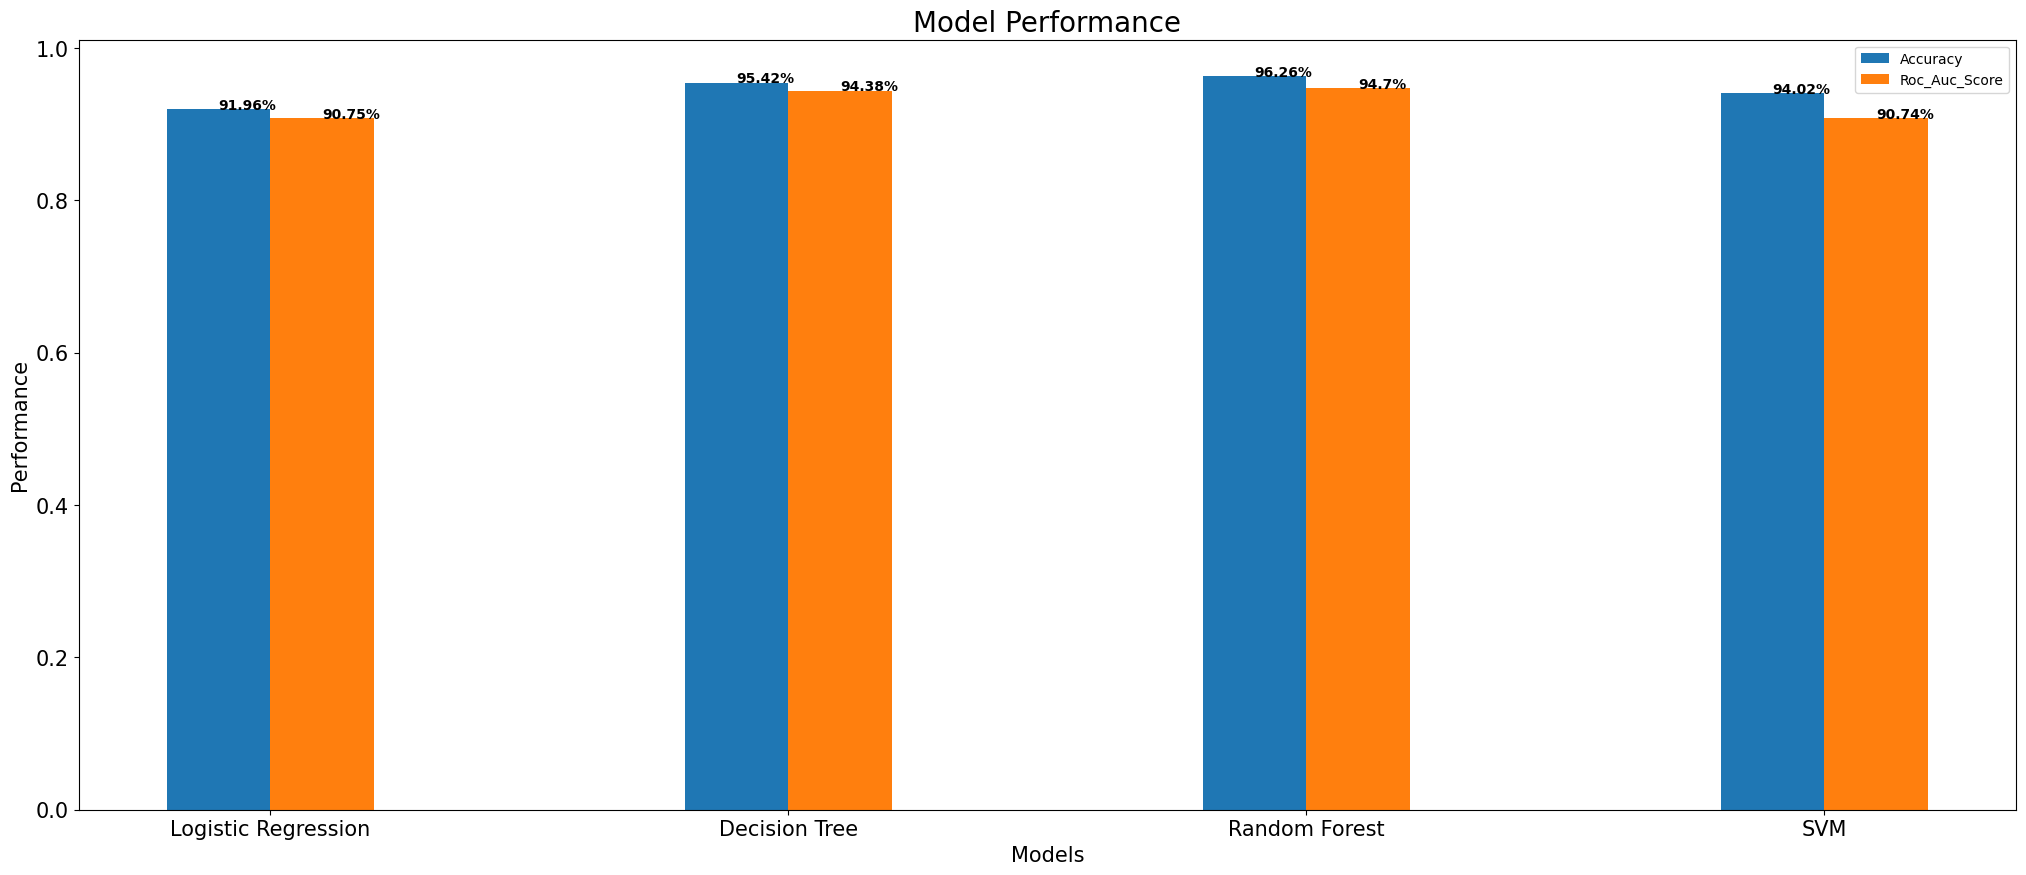

In [63]:


X_axis = np.arange(len(models))

plt.figure(figsize = (25,10))

plt.bar(X_axis - 0.1, accuracies, 0.2, label = 'Accuracy')
plt.bar(X_axis + 0.1, roc_auc_scores, 0.2, label = 'Roc_Auc_Score')

plt.xticks(X_axis, models, fontsize =15)
plt.yticks(fontsize =15)
plt.xlabel("Models", fontsize =15)
plt.ylabel("Performance", fontsize=15)
plt.title("Model Performance", fontsize = 20)
plt.legend()
for i in range(len(models)):
  plt.text(i-0.1, accuracies[i], str(round(accuracies[i]*100, 2))+'%', color='black', fontweight='bold')
  plt.text(i+0.1, roc_auc_scores[i], str(round(roc_auc_scores[i]*100, 2))+'%', color='black', fontweight='bold')
plt.show()
